# <font color='blue'>Normalização e Padronização</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## Normalização
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O objetivo da normalização é alterar os valores das colunas numéricas do conjunto de dados para uma escala comum, sem modificar as diferenças nos intervalos de valores.<br>
Não precisamos aplicar normalização a todo conjunto de dados. É necessário apenas quando as colunas ou variáveis tiverem intervalos diferentes. Por exemplo, considere o conjunto de dados contendo duas variáveis, idade (x1) e salário (x2). Onde a faixa etária da idade varia de 20 a 100, enquanto o salário varia de 1000 a 20.000. Neste exmplo, o salário é até 200 vezes maior do que a idade e com uma variação de valores muito maior. Então, essas duas variáveis estão em escalas e em intervalos muito diferentes. Ao utilizar um algoritmo de Regressão Linear, por exemplo, o salário influenciará muito mais no resultado devido ao seu valor maior. E isso causa problemas durante o treinamento do algoritmo. <br>
A normalização também é chamada simplesmente de Scaler Min-Max e basicamente reduz o intervalo dos dados de tal forma que o intervalo seja fixo entre 0 e 1, ou entre -1 e 1, se houver valores negativos. <br>
Fórmula para normalizar os dados: <br><br>
$x_{novo} = \frac{x - x_{min}}{x_{max}-x_{min}}$ <br> <br>
Alguns algoritmos de Machine Learning que requerem a normalização dos dados são: <br>
1.KNN com medida de distância euclidiana se quiser que todos os recursos contribuam igualmente no modelo. <br>
2.Regressão Logística, SVM, Perceptrons, Redes Neurais. <br>
3.K-Means <br>
4.Análise discriminante linear, análise de componentes principais, análise de componentes principais do kernel.<br>
Classificadores baseados em modelos gráficos, como Fisher LDA ou  Naive  Bayes,  bem como Árvores de Decisão e métodos baseados em árvore, como  Random  Forest, são invariantes à normalização das variáveis. <br>
**É muito importante deixar claro que os valores não são alterados, apenas são colocados em uma escala entre 0 e 1.**
</details>

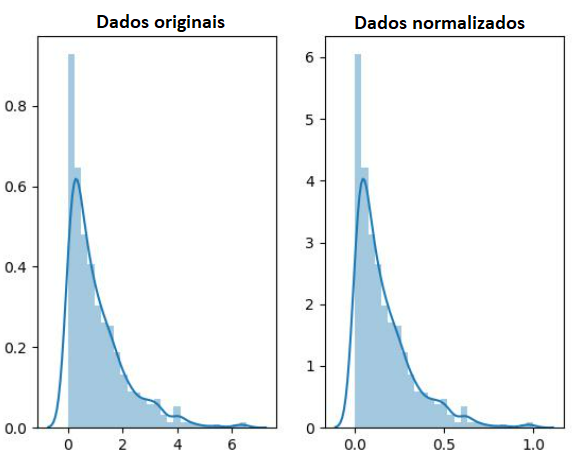

In [2]:
# Carregando imagem dados originais x dados normalizados
from IPython.display import Image
Image('Imagens/dados-originais-dados normalizados.png')

In [3]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
# Colettando os dados
df = pd.read_csv('Dados/Auto-mpg/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
valores = df[["mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]].values

# Cria o objeto da classe MinMaxScaler
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1
dadosNormalizados = min_max_scaler.fit_transform(valores)
dadosNormalizados

array([[0.45106383, 0.5       , 0.22175106, 0.204947  , 0.52534562,
        0.28304781, 0.23333333, 0.        , 1.        , 0.5       ,
        0.42857143],
       [0.45106383, 0.5       , 0.22175106, 0.204947  , 0.52534562,
        0.34824853, 0.3       , 0.        , 1.        , 0.5       ,
        0.42857143],
       [0.52765957, 0.        , 0.0920429 , 0.14487633, 0.50230415,
        0.20634109, 0.48928571, 1.        , 1.        , 0.5       ,
        0.        ],
       [0.46808511, 0.5       , 0.46620105, 0.204947  , 0.14746544,
        0.43518282, 0.58809524, 1.        , 0.        , 0.        ,
        0.        ],
       [0.35319149, 1.        , 0.72062859, 0.43462898, 0.1797235 ,
        0.49271286, 0.3       , 0.        , 0.        , 0.        ,
        0.14285714],
       [0.32765957, 0.5       , 0.38388626, 0.18727915, 0.        ,
        0.49782664, 0.68095238, 1.        , 0.        , 0.        ,
        0.        ],
       [0.16595745, 1.        , 0.72062859, 0.6819788 , 0.

In [6]:
# Redimensiona os dados para o estado original.
min_max_scaler.inverse_transform(dadosNormalizados)

array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,
          1.   ,   1.   ,   4.   ,   1.   ],
       [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,
          0.   ,   0.   ,   3.   ,   2.   ],
       [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,
          0.   ,   0.   ,   3.   ,   4.   ],
       [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,
          1.   ,   0.   ,   4.   ,   2.   ],
       [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,
 

## Padronização
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

A padronização, também conhecida como normalização do escore Z, ou em inglês Standardization, ou ainda Standard Scaler é o processo de redimensionamento dos valores das variáveis para que eles tenham as propriedades de uma distribuição normal. Os dados em uma distribuição normal possuem média igual a zero e desvio padrão igual a 1. <br>
Os escores z das variáveis são calculadas da seguinte forma:<br><br>
$Z = \frac{X - μ}{σ}$ <br> <br>
Onde:<br>
x é o valor da variável;<br>
μ é a média;<br>
e σ é o desvio padrão.<br>
A padronização é amplamente utilizada com os algoritmos SVMs, regressão logística e redes neurais.

</details>

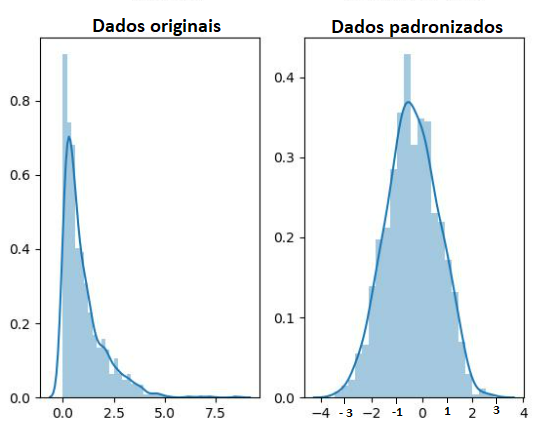

In [7]:
# Carregando imagem dados originais x dados padronizados
Image('Imagens/dados-originais-versus-dados padronizados.png')

In [8]:
# Criando os  dados
dicionario = {
    "coluna1": [1., 2., 0.],
    "coluna2": [-1., 0., 1.],
    "coluna3": [2., 0., -1.]
}

df2 = pd.DataFrame(dicionario)
df2

,coluna1,coluna2,coluna3
0,1.0,-1.0,2.0
1,2.0,0.0,0.0
2,0.0,1.0,-1.0


In [9]:
# Exibe um resumo estatístico dos dados
df2.describe()

,coluna1,coluna2,coluna3
count,3.0,3.0,3.000000
mean,1.0,0.0,0.333333
std,1.0,1.0,1.527525
min,0.0,-1.0,-1.000000
25%,0.5,-0.5,-0.500000
50%,1.0,0.0,0.000000
75%,1.5,0.5,1.000000
max,2.0,1.0,2.000000


In [10]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
valores = df2.values

# Cria o objeto StandardScaler
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados.
valoresPadronizados = scaler.fit_transform(valores)
valoresPadronizados

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [11]:
# axis = 0 em NumPy refere-se à coluna
# Neste exemplo está retornando a média de todas as colunas
valoresPadronizados.mean(axis=0)

array([0., 0., 0.])

In [12]:
# axis = 0 em NumPy refere-se à coluna
# Neste exemplo está retornando o desvio padrão de todas as colunas
valoresPadronizados.std(axis=0)

array([1., 1., 1.])

In [13]:
# Exibe o resumo estatístico dos dados
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [14]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
valores = df[["mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]].values

# Calcula a média e o desvio-padrão a serem usados para dimensionar os dados
scaler = StandardScaler().fit(valores)

# Realiza a padronização centralizando e dimensionando dados.
valoresPadronizados = scaler.transform(valores)

In [15]:
# axis = 0 em NumPy refere-se à coluna
# Neste exemplo está retornando a média de todas as colunas
valoresPadronizados.mean(axis=0)

array([-4.99600361e-16,  2.77555756e-17,  1.66533454e-16,  0.00000000e+00,
       -3.05311332e-16, -4.71844785e-16, -1.47104551e-15,  0.00000000e+00,
        0.00000000e+00, -2.77555756e-17, -2.77555756e-17])

In [16]:
# axis = 0 em NumPy refere-se à coluna
# Neste exemplo está retornando o desvio padrão de todas as colunas
valoresPadronizados.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
# Retorna os dados para o estado original.
scaler.inverse_transform(valoresPadronizados)

array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,
          1.   ,   1.   ,   4.   ,   1.   ],
       [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,
          0.   ,   0.   ,   3.   ,   2.   ],
       [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,
          0.   ,   0.   ,   3.   ,   4.   ],
       [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,
          1.   ,   0.   ,   4.   ,   2.   ],
       [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,
 